<a href="https://colab.research.google.com/github/kavinaya10206/movie-recommendation-project/blob/main/personalized_movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies.dropna(inplace=True)

In [37]:
movies.dropna(inplace=True)
movies['genres'] = movies['genres'].str.split('|').apply(tuple)
movies.drop_duplicates(inplace=True)
movies['genres'] = movies['genres'].apply(list)

In [38]:
import re
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
movies['title'] = movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [39]:
movies['genres'] = movies['genres'].str.split('|')

In [49]:
# Replace NaN values with an empty list in the 'genres' column before applying MultiLabelBinarizer.
movies['genres'] = movies['genres'].apply(lambda x: x if isinstance(x, list) else [])

# Proceed with the MultiLabelBinarizer as before
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(movies['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
movies = pd.concat([movies, genres_df], axis=1)

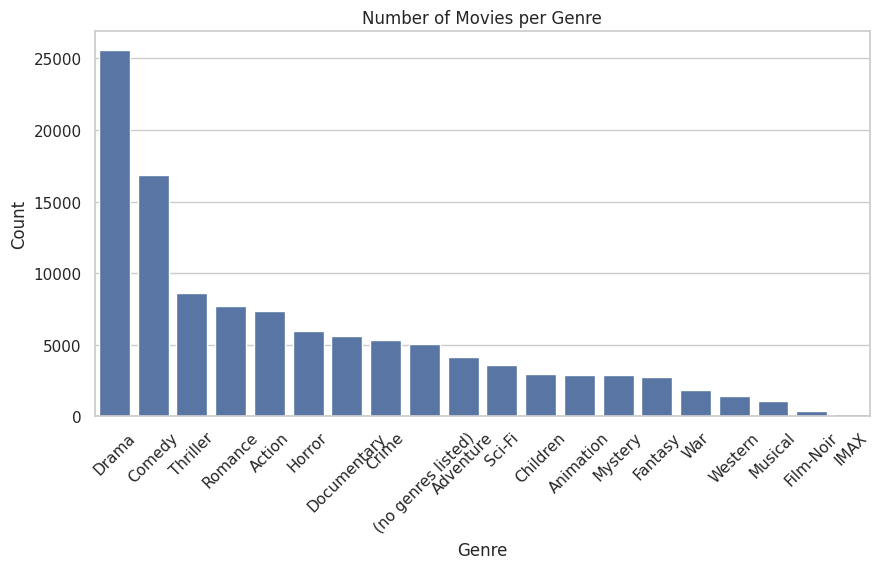

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Genre frequency
genre_counts = genres_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Movies per Genre')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

In [20]:
X = movies[['year']]
y = genres_df

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train['year'] = X_train['year'].fillna(X_train['year'].median())
X_test['year'] = X_test['year'].fillna(X_test['year'].median())
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
lr_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print(lr_preds)
preds_df = pd.DataFrame(lr_preds, columns=y_test.columns)
print(preds_df)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
       (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                       0       0          0          0         0       0   
1                       0       0          0          0         0       0   
2                       0       0          0          0         0       0   
3                       0       0          0          0         0       0   
4                       0       0          0          0         0       0   
...                   ...     ...        ...        ...       ...     ...   
12480                   0       0          0          0         0       0   
12481                   0       0          0          0         0       0   
12482                   0       0          0          0         0       0   
12483                   0       0          0          0         0       0   
12484                   0       0

In [32]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
rf_preds = rf_model.predict(X_test)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Logistic Regression F1 Score:", f1_score(y_test, lr_preds, average='micro'))
print("Random Forest F1 Score:", f1_score(y_test, rf_preds, average='micro'))

Logistic Regression F1 Score: 0.0
Random Forest F1 Score: 0.011630468302568395
